Calculated period, T = 2.17 s
Estimated small-displacement angle period, Tharm = 2.0060666807106475 s
SciPy calculated period, T = 2.152874666880516 s


c:\Users\kannu\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


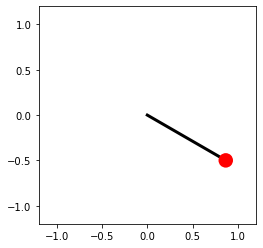

In [2]:
# Importing dependencies

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk
import matplotlib.animation as animation
from matplotlib import rc

rc('animation', html='jshtml')

m = 1
L = 1
g = 9.81
theta0 = np.radians(60)             # Angular Displacement
v0 = 0                              # Tangential Velocity

# Estimating the period using the harmonic (small displacement) approximation.
Tharm = 2 * np.pi * np.sqrt(L / g)
dt = 0.01                           # Time step
# Initial Values
theta = [theta0]
v = [v0]
old_theta = theta0
i = 0
while True:
    i += 1
    t = i * dt
    
    old_theta, old_v = theta[-1], v[-1]
    omega = old_v / L
    new_theta = old_theta - omega * dt
    acc = g * np.sin(old_theta)     # Tangential acceleration.
    new_v = old_v + acc * dt        # updating the tangential velocity.
    
    if t > Tharm and new_v * old_v < 0:
        # At the second turning point(extreme) we reach initial position so, we have completed one period and the simulation ends.
        break
    
    theta.append(new_theta)
    v.append(new_v)
    
nsteps = len(theta)
T = nsteps * dt
print('Calculated period, T = {} s'.format(T))
print('Estimated small-displacement angle period, Tharm = {} s'.format(Tharm))
k = np.sin(theta0/2)
print('SciPy calculated period, T = {} s'.format(2 * Tharm / np.pi * ellipk(k**2)))


def get_coords(th):
    return L * np.sin(th), -L * np.cos(th)
#Animating
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
x0, y0 = get_coords(theta0)
line, = ax.plot([0, x0], [0, y0], lw=3, c='k')
bob_radius = 0.08
circle = ax.add_patch(plt.Circle(get_coords(theta0), bob_radius, fc='r', zorder=3))
ax.set_xlim(-L*1.2, L*1.2)
ax.set_ylim(-L*1.2, L*1.2)

def animate(i):
    x, y = get_coords(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))
    
ani = animation.FuncAnimation(fig, animate, frames=nsteps, repeat=True, interval=dt*1000)
